In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


TASK DESCRIPTION


Based on sales data for the month of September. Using this data, please try to answer  the below and come up with additional insights if any: 
Using these data, create following visualizations: 
1. Sales conversion & revenue generated with respect to Trainers with grade wise drilldown.ie,  represent the number of conversions made by each Trainer grade wise. 
2. Sales conversion & revenue generated with respect to Trainers with Topic wise drilldown. 3. Sales conversion & revenue generated with respect to Topic 
4. Sales conversion & revenue generated with respect to grade 
5. Sales conversions made, revenue generated & incentive received by each sales person if 10%  of revenue from each deal secured by the sales person goes to him/her as incentive. 
6. Time taken for Sales conversion 


Field details: 
1. Trial Class Batch – Batch ID of the Trial Class that child attended 
2. Date of Trial – The date when child attended the Trial class 
3. Child Name (anonymous child name - Don’t use for mapping) – Child Name (Don’t use  as ID) 
4. Deal – Stage – Stage of the funnel where the child is 
5. Deal – Owner – The sales person assigned to that user 
6. Deal – Value – Amount Paid by User 
7. Person – Phone – Phone number of Parent 
8. Person – Email – Email of the Parent 
9. Person - Person UUID – Unique ID provided to the child 
10. Person – Grade – Grade of the child 
11. Deal - Deal closed on – Date when the deal is closed 
12. Deal - Deal created – date when the deal is created 
13. Deal - Last activity date – date of last activity 
14. Deal – Pipeline – The pipeline in which the lead is 
15. Deal – Status – status of the lead 
16. Deal - Update time – date of last update 
17. Deal - Won time – date of lead won  
18. Person - Total Live Classes - Total live classes bought 
19. Person - Trial Class Topic – Topic of the trial class 
20. Person - Facilitator Name – Trainer for the trial class


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/APPLIED AI ASSIGNMENTS ipynb/Data_analyst_assignment_v2 (1).xlsx')

In [ ]:

data.columns

Index(['Trial Class Batch', 'Date of Trial',
       'Child Name (anonymous child name - Don’t use for mapping)',
       'Deal - Stage', 'Deal - Owner', 'Deal - Value', 'Person - Phone',
       'Person - Email', 'Person - Person UUID', 'Person - Grade',
       'Deal - Deal closed on', 'Deal - Deal created',
       'Deal - Last activity date', 'Deal - Pipeline', 'Deal - Status',
       'Deal - Update time', 'Deal - Won time', 'Person - Total Live Classes',
       'Person - Trial Class Topic', 'Person - Facilitator Name'],
      dtype='object')

In [ ]:
data.head(3)

,Trial Class Batch,Date of Trial,Child Name (anonymous child name - Don’t use for mapping),Deal - Stage,Deal - Owner,Deal - Value,Person - Phone,Person - Email,Person - Person UUID,Person - Grade,Deal - Deal closed on,Deal - Deal created,Deal - Last activity date,Deal - Pipeline,Deal - Status,Deal - Update time,Deal - Won time,Person - Total Live Classes,Person - Trial Class Topic,Person - Facilitator Name
0,"fREADom Trial II - Grade 1,2 04-09-2020 16:00:00",2020-09-04,CHILD_NAME_0010001,Trial Class Attended,Adarsh,0,911100221000,s2m_test_20001@tests2m.com,f2b6db38-8f1b-4bd5-8a69-37bb62c8d36f,Grade 1,NaT,2020-09-04 22:26:10,NaT,fREADom Conversion,Open,2020-09-05 12:21:08,NaT,NaN,Category Spin,FLTR0103
1,"fREADom Trial XXIX - Grade 1,2 25-09-2020 17:1...",2020-09-25,CHILD_NAME_0010002,Paid,Ankita,4999,911100221000,s2m_test_20002@tests2m.com,f9c7ff46-a030-4985-ba0b-cb3cef2c18d7,Senior KG,NaT,2020-09-25 18:04:15,2020-09-27,fREADom Conversion,Open,2020-09-27 23:46:54,NaT,32.0,Words & Stories,FLTR0104
2,"fREADom Trial VII - Grade 1,2 29-09-2020 17:15:00",2020-09-29,CHILD_NAME_0010003,Trial Class Attended,Nikita,0,911100221000,s2m_test_20003@tests2m.com,d47e63bb-1579-48ef-9868-2fce77e831db,Grade 1,NaT,2020-09-29 18:11:06,NaT,fREADom Conversion,Open,2020-10-01 10:40:56,NaT,NaN,Category Spin,FLTR0104


In [ ]:
df = data.loc[:,['Date of Trial','Deal - Stage','Deal - Owner', 'Deal - Value','Person - Person UUID','Person - Grade',
       'Deal - Deal closed on', 'Deal - Deal created',
       'Deal - Last activity date', 'Deal - Pipeline', 'Deal - Status',
       'Deal - Update time', 'Deal - Won time', 'Person - Total Live Classes',
       'Person - Trial Class Topic', 'Person - Facilitator Name']]

In [ ]:
df.columns.values

array(['Date of Trial', 'Deal - Stage', 'Deal - Owner', 'Deal - Value',
       'Person - Person UUID', 'Person - Grade', 'Deal - Deal closed on',
       'Deal - Deal created', 'Deal - Last activity date',
       'Deal - Pipeline', 'Deal - Status', 'Deal - Update time',
       'Deal - Won time', 'Person - Total Live Classes',
       'Person - Trial Class Topic', 'Person - Facilitator Name'],
      dtype=object)

In [ ]:
import re
#data.columns.values = re.sub(' | - ','_',data.columns.values )
df = df.rename(columns=lambda x: re.sub(' - | ','_',x))

In [ ]:
df.columns

Index(['Date_of_Trial', 'Deal_Stage', 'Deal_Owner', 'Deal_Value',
       'Person_Person_UUID', 'Person_Grade', 'Deal_Deal_closed_on',
       'Deal_Deal_created', 'Deal_Last_activity_date', 'Deal_Pipeline',
       'Deal_Status', 'Deal_Update_time', 'Deal_Won_time',
       'Person_Total_Live_Classes', 'Person_Trial_Class_Topic',
       'Person_Facilitator_Name'],
      dtype='object')

In [ ]:
d = {'Person_Person_UUID':'Person_uuid', 'Deal_Deal_closed_on':'Deal_closed_on',
       'Deal_Deal_created':'Deal_created'}
df = df.rename(columns=d,inplace=False)
df.columns
df

,Date_of_Trial,Deal_Stage,Deal_Owner,Deal_Value,Person_uuid,Person_Grade,Deal_closed_on,Deal_created,Deal_Last_activity_date,Deal_Pipeline,Deal_Status,Deal_Update_time,Deal_Won_time,Person_Total_Live_Classes,Person_Trial_Class_Topic,Person_Facilitator_Name
0,2020-09-04,Trial Class Attended,Adarsh,0,f2b6db38-8f1b-4bd5-8a69-37bb62c8d36f,Grade 1,NaT,2020-09-04 22:26:10,NaT,fREADom Conversion,Open,2020-09-05 12:21:08,NaT,NaN,Category Spin,FLTR0103
1,2020-09-25,Paid,Ankita,4999,f9c7ff46-a030-4985-ba0b-cb3cef2c18d7,Senior KG,NaT,2020-09-25 18:04:15,2020-09-27,fREADom Conversion,Open,2020-09-27 23:46:54,NaT,32.0,Words & Stories,FLTR0104
2,2020-09-29,Trial Class Attended,Nikita,0,d47e63bb-1579-48ef-9868-2fce77e831db,Grade 1,NaT,2020-09-29 18:11:06,NaT,fREADom Conversion,Open,2020-10-01 10:40:56,NaT,NaN,Category Spin,FLTR0104
3,2020-09-24,Not Interested,Vibhor,0,e12f0129-2cc7-47ff-bf59-a31b4f20522d,Senior KG,NaT,2020-09-24 18:09:01,2020-09-25,fREADom Conversion,Open,2020-09-25 17:28:24,NaT,NaN,Words & Stories,FLTR0104
4,2020-09-24,Not Interested,Vibhor,0,eae8a70e-5aad-467e-a9c9-ed21b662044c,Senior KG,NaT,2020-09-24 18:09:32,2020-09-26,fREADom Conversion,Open,2020-09-26 14:47:02,NaT,NaN,Words & Stories,FLTR0104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,2020-09-17,Trial Class Attended,Adarsh,0,7b438159-7931-49bf-8b6f-391d2c803607,Grade 3,NaT,2020-09-17 21:00:32,NaT,fREADom Conversion,Open,2020-09-19 14:21:15,NaT,NaN,Compare Characters,FLTR0140
13560,2020-09-19,Paid,Sudhir,1700,247f53d0-17c0-4d17-9abe-ef140b8f2614,Senior KG,2020-09-21 19:34:15,2020-09-19 19:40:31,NaT,fREADom Conversion,Won,2020-09-21 19:34:15,2020-09-21 19:34:15,12.0,Words & Stories,FLTR0108
13561,2020-09-16,Not Interested,Juhi,0,4bfd7cc8-d7a6-4094-b323-dc3525537d93,Grade 4,NaT,2020-09-16 18:34:04,2020-09-17,fREADom Conversion,Open,2020-09-29 10:54:06,NaT,NaN,Acrostic poem,FLTR0106
13562,2020-09-05,1st Call Attempted,Aman,0,12110665-d0f9-48ee-a5c7-ae2da5ea62b9,NaN,NaT,2020-09-05 23:12:22,2020-09-13,fREADom Conversion,Open,2020-09-13 11:36:12,NaT,12.0,NaN,NaN


In [ ]:
df.info(null_counts=1)
#    Person_Grade               13531 non-null  object        
#    Deal_closed_on             976 non-null    datetime64[ns] *****
 #   Deal_Last_activity_date    8674 non-null   datetime64[ns] ***
 #   Deal_Won_time              972 non-null    datetime64[ns]***
 #   Person_Total_Live_Classes  1524 non-null   float64       ***
 #   Person_Trial_Class_Topic   13500 non-null  object        **
 #   Person_Facilitator_Name    13505 non-null  object        **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date_of_Trial              13564 non-null  datetime64[ns]
 1   Deal_Stage                 13564 non-null  object        
 2   Deal_Owner                 13564 non-null  object        
 3   Deal_Value                 13564 non-null  int64         
 4   Person_uuid                13564 non-null  object        
 5   Person_Grade               13531 non-null  object        
 6   Deal_closed_on             976 non-null    datetime64[ns]
 7   Deal_created               13564 non-null  datetime64[ns]
 8   Deal_Last_activity_date    8674 non-null   datetime64[ns]
 9   Deal_Pipeline              13564 non-null  object        
 10  Deal_Status                13564 non-null  object        
 11  Deal_Update_time           13564 non-null  datetime64[ns]
 12  Deal

In [ ]:
df[['Deal_closed_on',	'Deal_created',	'Deal_Last_activity_date',	'Deal_Pipeline',	'Deal_Status',	'Deal_Update_time',	'Deal_Won_time'	]].head()

,Deal_closed_on,Deal_created,Deal_Last_activity_date,Deal_Pipeline,Deal_Status,Deal_Update_time,Deal_Won_time
0,NaT,2020-09-04 22:26:10,NaT,fREADom Conversion,Open,2020-09-05 12:21:08,NaT
1,NaT,2020-09-25 18:04:15,2020-09-27,fREADom Conversion,Open,2020-09-27 23:46:54,NaT
2,NaT,2020-09-29 18:11:06,NaT,fREADom Conversion,Open,2020-10-01 10:40:56,NaT
3,NaT,2020-09-24 18:09:01,2020-09-25,fREADom Conversion,Open,2020-09-25 17:28:24,NaT
4,NaT,2020-09-24 18:09:32,2020-09-26,fREADom Conversion,Open,2020-09-26 14:47:02,NaT


In [ ]:
df.pivot_table(values = ['Deal_Status'], index = ['Deal_Owner','Person_Grade',],aggfunc='count' )

Deal_Status
Deal_Owner Person_Grade             
Adarsh     Grade 1               507
           Grade 2               321
           Grade 3               390
           Grade 4               317
           Grade 5                 1
...                              ...
Vibhor     Grade 1                83
           Grade 2                79
           Grade 3                68
           Grade 4                63
           Senior KG              42

[205 rows x 1 columns]

In [ ]:
df['Deal_Owner'].value_counts()
len(df['Deal_Owner'].unique())

38

In [ ]:
df[df.Deal_Status == 'Won']['Person_Grade'] .value_counts()

Grade 1      252
Grade 2      227
Grade 3      216
Grade 4      177
Senior KG     98
Grade 5        1
Junior KG      1
Name: Person_Grade, dtype: int64

In [ ]:
len(df['Person_Grade'].unique()) , df['Person_Grade'].unique()

(11, array(['Grade 1', 'Senior KG', 'Grade 4', 'Grade 3', 'Grade 2', nan,
        'Grade 5', 'Grade 6', 'Junior KG', 'Nursery', 'Grade 8'],
       dtype=object))

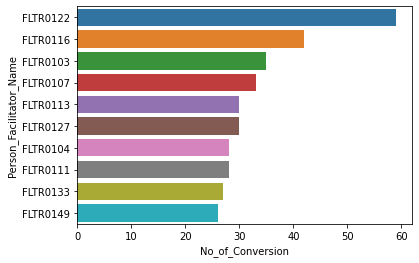

In [ ]:
#FACILITATOR WISE CONVERSONS

df1=df.groupby(['Person_Facilitator_Name','Deal_Status'],as_index=False).agg({'Deal_Stage':'count'})
df1 = df1[df1.Deal_Status =='Won']
df1 = df1.sort_values(by =['Deal_Stage'],ascending=False).head(10)

#plt.barh(y=df1.Person_Facilitator_Name,width=df1.Deal_Stage)
sns.barplot(x='Deal_Stage',y='Person_Facilitator_Name',data=df1)
plt.xlabel('No_of_Conversion')
plt.show()




for Grade 1 : 173 deals won


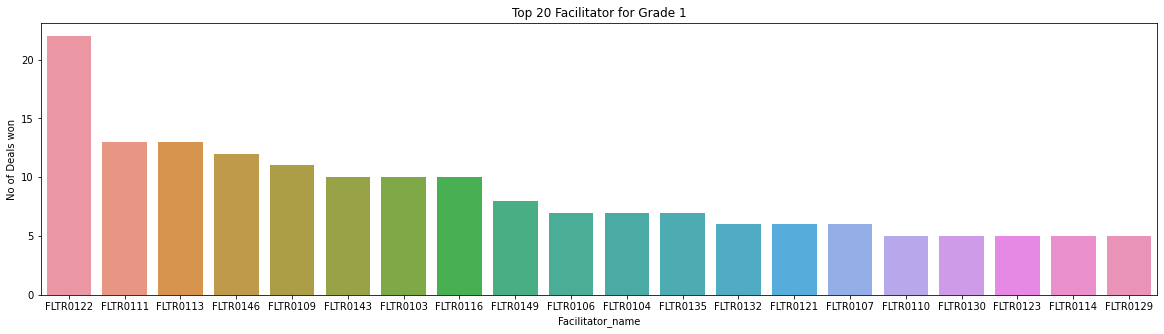

for Senior KG : 81 deals won


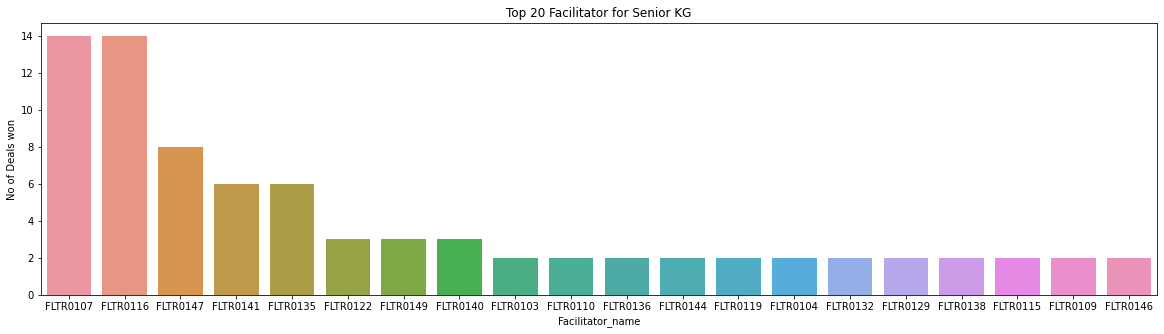

for Grade 4 : 132 deals won


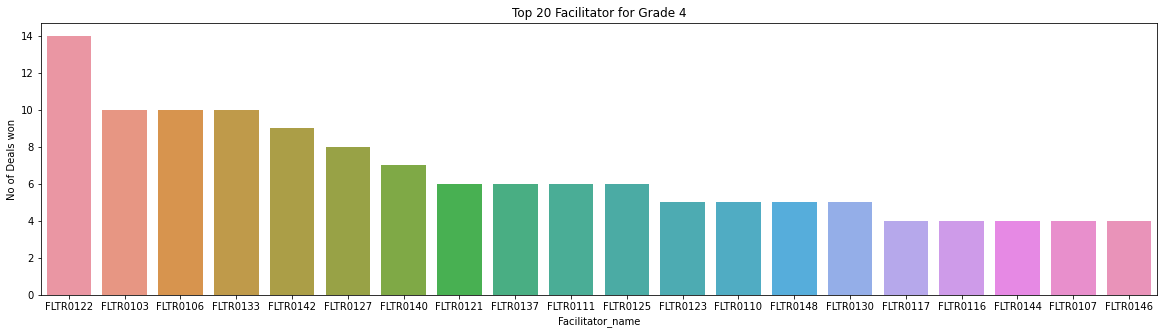

for Grade 3 : 141 deals won


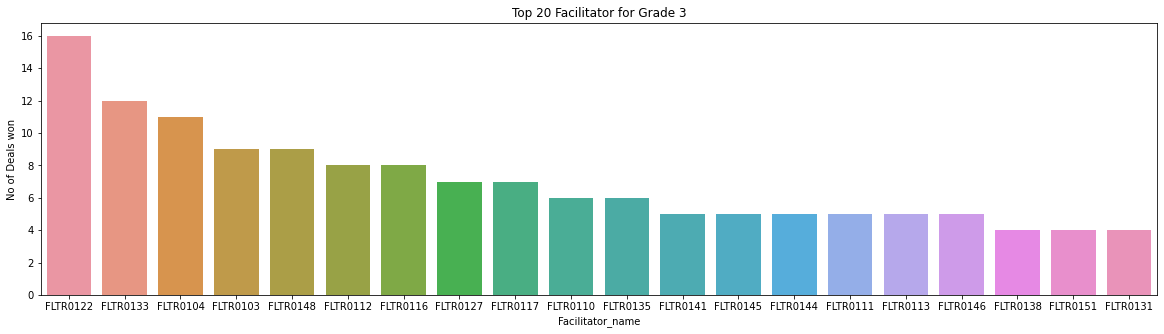

for Grade 2 : 167 deals won


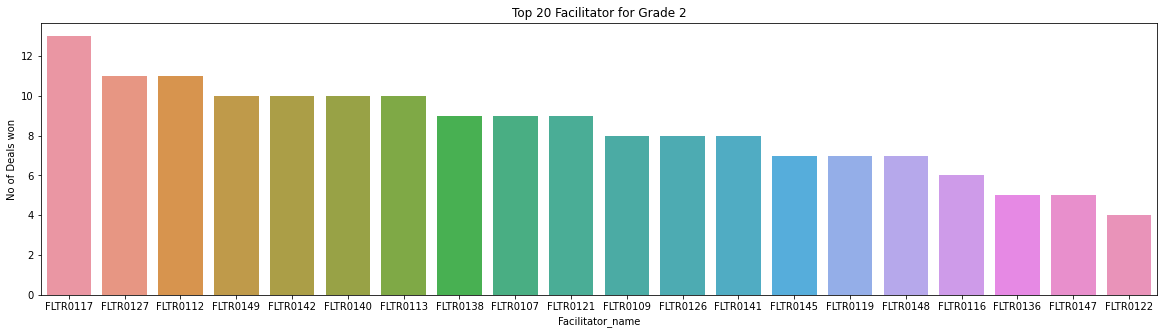

for Grade 5 : 1 deals won


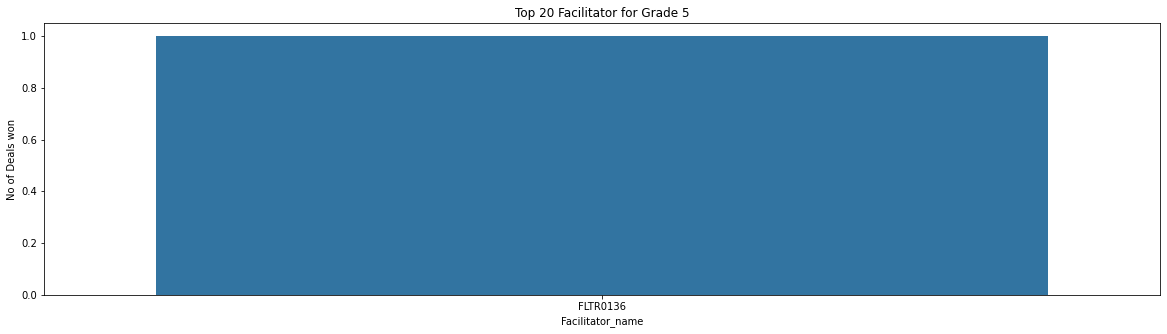

for Junior KG : 1 deals won


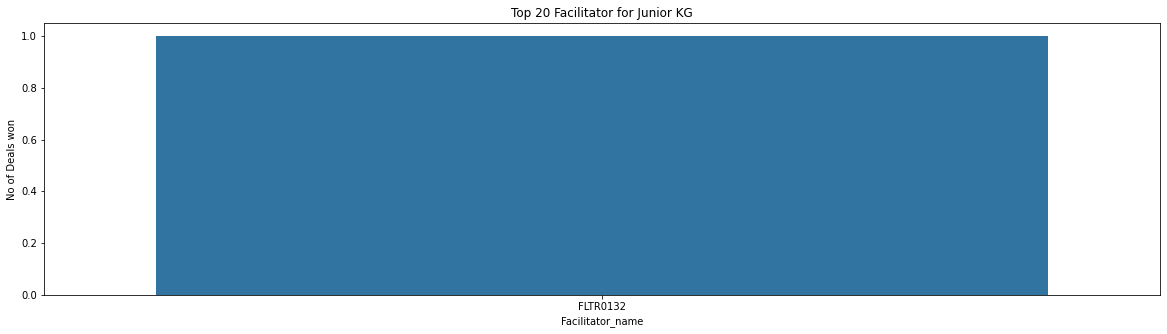

In [ ]:
#GRADE WISE SALES CONVERSION

a = ['Grade 1', 'Senior KG', 'Grade 4', 'Grade 3', 'Grade 2',
       'Grade 5', 'Grade 6', 'Junior KG', 'Nursery', 'Grade 8']

group_obj = df[df['Deal_Status']=='Won'].groupby(['Person_Grade'])

for i in a:
  try:
    df_ = group_obj.get_group(i)['Person_Facilitator_Name'].value_counts()[:20].reset_index()
    plt.subplots(nrows=1,ncols=1,figsize=(20,5),squeeze=False)
    sns.barplot(x='index',y = 'Person_Facilitator_Name',data=df_)
    plt.xlabel('Facilitator_name')
    plt.ylabel('No of Deals won')
    plt.title('Top 20 Facilitator for {}'.format(i))
    print('for {} : {} deals won'.format(i,df_.Person_Facilitator_Name.sum()))
    plt.show()
  except:
    continue
#    print('for {} : {} deals won'.format(i,df_.Person_Facilitator_Name.sum()))

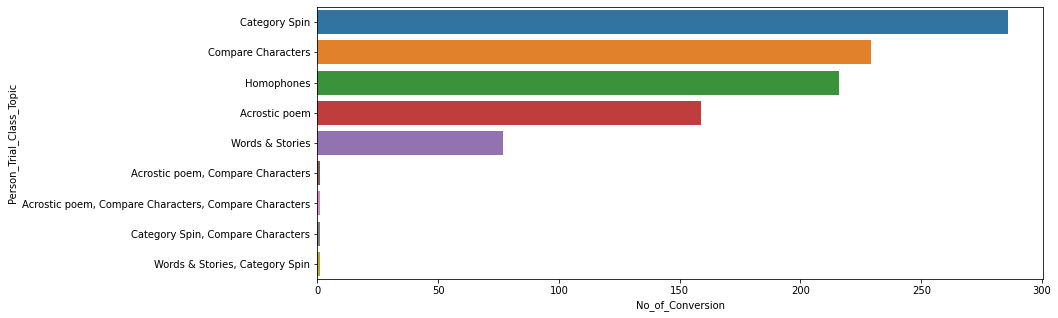

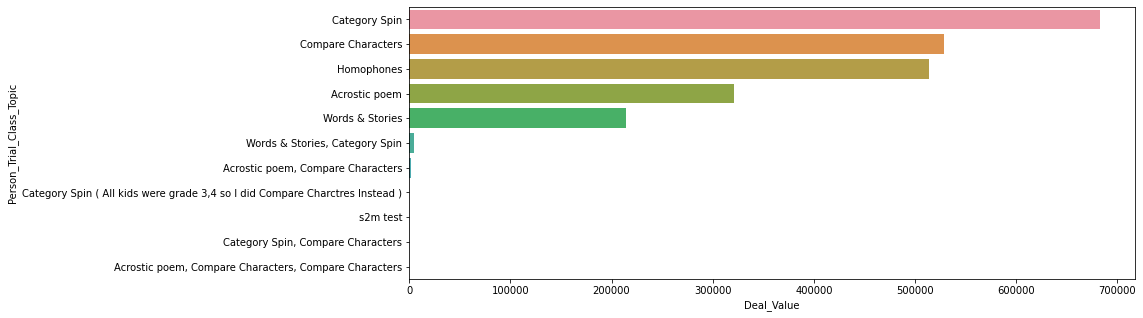

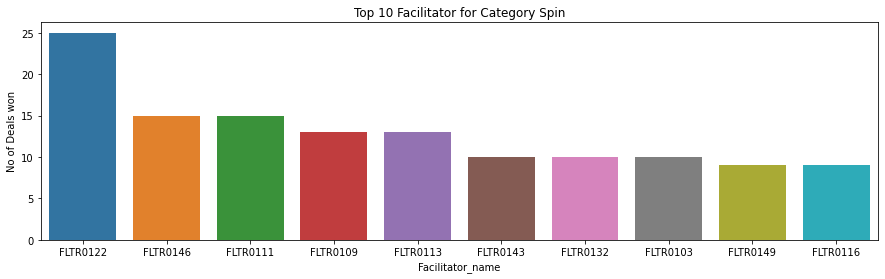

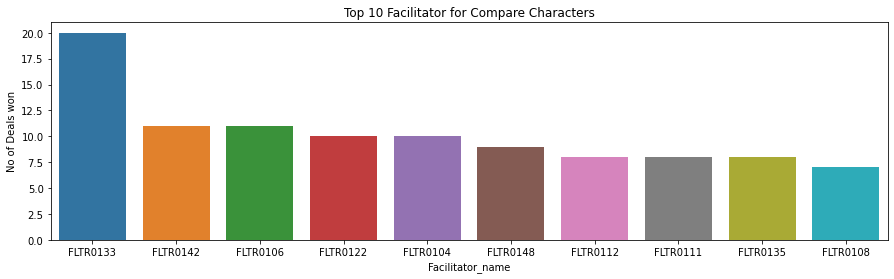

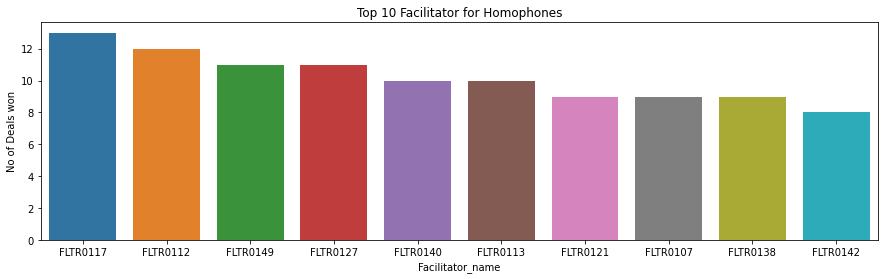

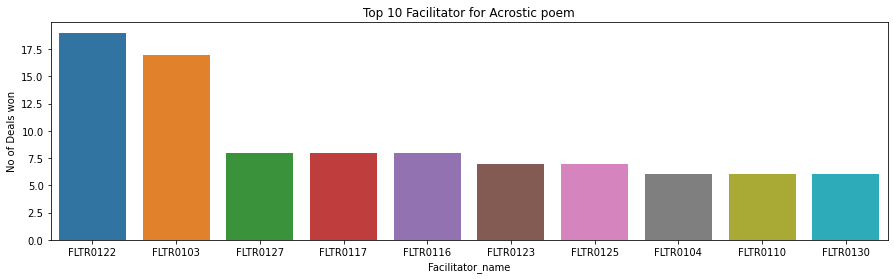

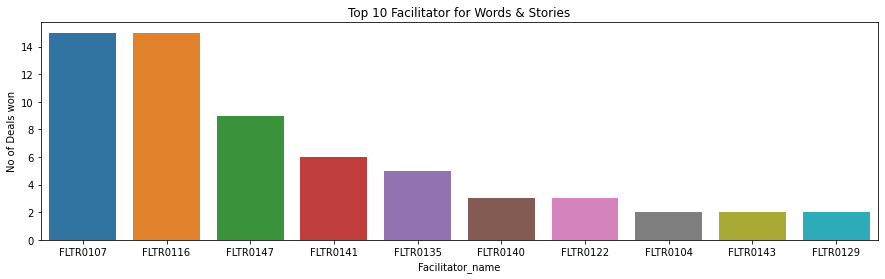

In [ ]:
## Task 2 :TOPIC WISE SALES CONVERSION

df1=df.groupby(['Person_Trial_Class_Topic','Deal_Status'],as_index=False).agg({'Deal_Stage':'count'})
df1 = df1[df1.Deal_Status =='Won']
df1 = df1.sort_values(by =['Deal_Stage'],ascending=False)

#plt.barh(y=df1.Person_Facilitator_Name,width=df1.Deal_Stage)
#plt.subplots(1,2,figsize=(15,5))
plt.figure(figsize=(13,5))
sns.barplot(x='Deal_Stage',y='Person_Trial_Class_Topic',data=df1)
plt.xlabel('No_of_Conversion')
plt.show()

df_ = None
df_=df.groupby(['Person_Trial_Class_Topic'],as_index=False,sort = 0 ).agg({"Deal_Value":"sum"}).sort_values(by = 'Deal_Value',ascending=False)
plt.figure(figsize=(13,5))
sns.barplot(x='Deal_Value',y='Person_Trial_Class_Topic',data=df_)
plt.show()


#plt.subplots(1,2)
for i in df1.Person_Trial_Class_Topic[:5]:
  group_obj = df[df['Deal_Status']=='Won'].groupby(['Person_Trial_Class_Topic'])
  df_ = group_obj.get_group(i)['Person_Facilitator_Name'].value_counts()[:10].reset_index()
  plt.subplots(nrows=1,ncols=1,figsize=(15,4),squeeze=False)
  sns.barplot(x='index',y = 'Person_Facilitator_Name',data=df_)
  plt.xlabel('Facilitator_name')
  plt.ylabel('No of Deals won')
  plt.title('Top 10 Facilitator for {}'.format(i))
  plt.show()

In [ ]:
df.Deal_Status.value_counts()

Open    12588
Won       972
Lost        4
Name: Deal_Status, dtype: int64

In [ ]:
#df.Deal_Status=df.Deal_Status.apply(lambda x :'Unsucessful' if not 'Won')
#Converting successful deals as label 1 and for all the other categories with label 0

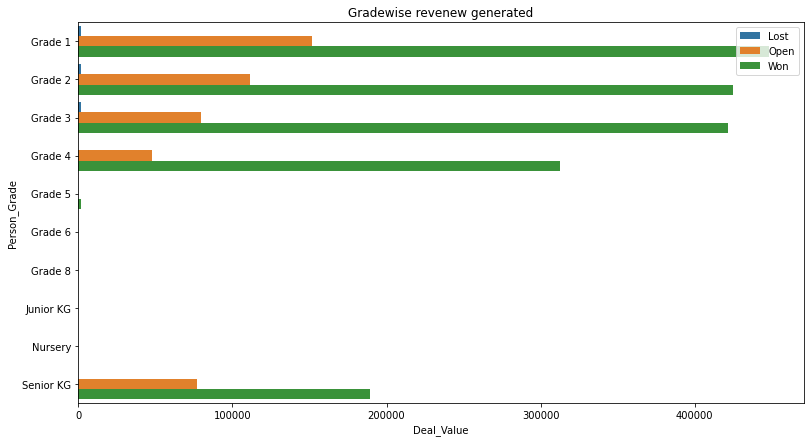

In [ ]:
#Grade wise revenue and deal conversion 
df3 = df.groupby(['Person_Grade','Deal_Status'],as_index=False).agg({'Deal_Value':'sum'},normalise = True)
df3.sort_values(by='Deal_Value')
plt.figure(figsize=(13,7))
ax = sns.barplot(x = 'Deal_Value', y = 'Person_Grade',hue='Deal_Status',data = df3)
#ax = plt.annotate(''.format(df3.values[i]))
plt.title('Gradewise revenew generated')
plt.legend()
plt.show()


## gradewise revenue generated from success full deals(labeled 1 orange) and unsucessful deals (labeled 0 blue )  

In [ ]:
df3 = df.groupby(['Person_Grade','Deal_Status'],as_index=False).agg({'Deal_Value':'sum'})
df3.sort_values(by='Deal_Value')

,Person_Grade,Deal_Status,Deal_Value
17,Nursery,Open,0
16,Junior KG,Won,0
15,Junior KG,Open,0
14,Grade 8,Open,0
13,Grade 6,Open,0
11,Grade 5,Open,0
0,Grade 1,Lost,1999
3,Grade 2,Lost,1999
6,Grade 3,Lost,1999
12,Grade 5,Won,2000


In [ ]:
df[df['Deal_Status']=='Won'].Person_Trial_Class_Topic.value_counts()

Category Spin                                            286
Compare Characters                                       229
Homophones                                               216
Acrostic poem                                            159
Words & Stories                                           77
Category Spin, Compare Characters                          1
Acrostic poem, Compare Characters, Compare Characters      1
Acrostic poem, Compare Characters                          1
Words & Stories, Category Spin                             1
Name: Person_Trial_Class_Topic, dtype: int64

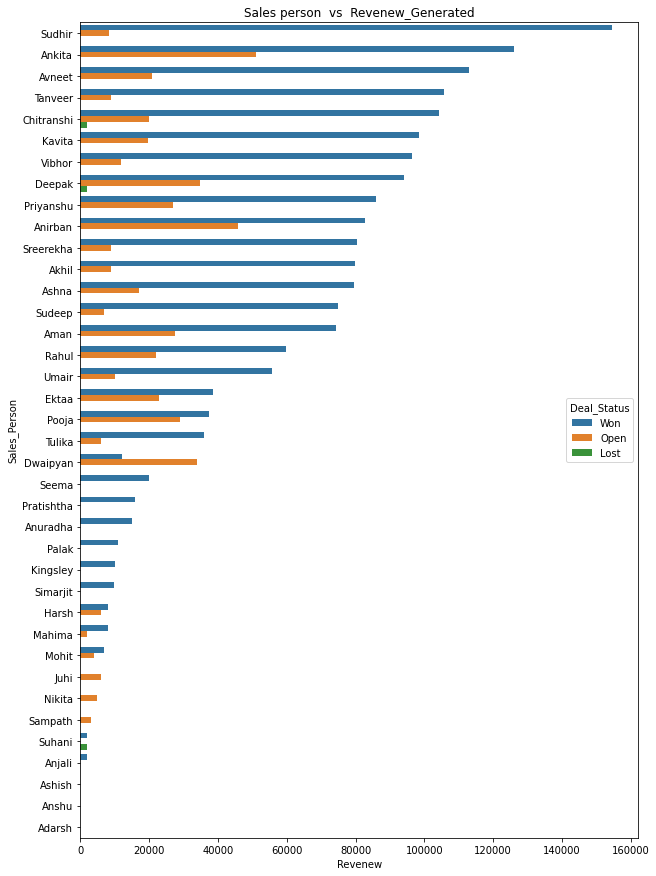

In [ ]:
#df.Deal_Status=df.Deal_Status.apply(lambda x : 1 if x=='Won' else 0)

df2=df.groupby(['Deal_Owner','Deal_Status'],as_index=False).agg({'Deal_Stage':'count','Deal_Value': 'sum'}).sort_values(by = 'Deal_Value',ascending=False)
#df2 = df2[df2.Deal_Status =='Won']
df2.head(30)
plt.figure(figsize=(10,15))
ax = sns.barplot(x='Deal_Value',y='Deal_Owner',hue='Deal_Status',data=df2, )
plt.title('Sales person  vs  Revenew_Generated')
plt.xlabel('Revenew')
plt.ylabel('Sales_Person')
plt.show()

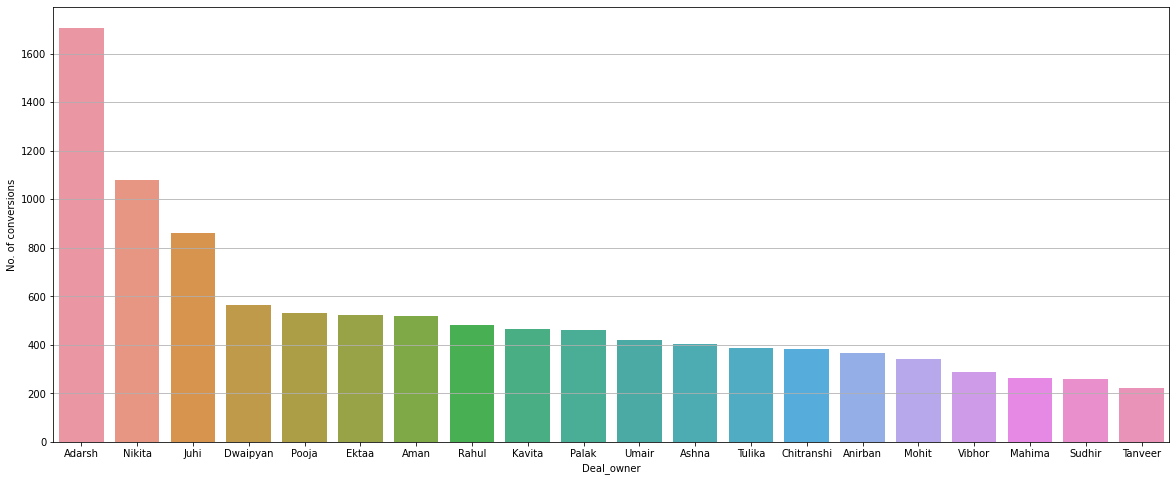

In [ ]:
#df.Deal_Status=df.Deal_Status.apply(lambda x : 1 if x=='Won' else 0)
df2=df.groupby(['Deal_Owner','Deal_Status'],as_index=False).agg({'Deal_Stage':'count'}).sort_values(by='Deal_Stage',ascending=False)
df2.head(30)
plt.figure(figsize=(20,8))
plt.grid()
sns.barplot(y='Deal_Stage',x='Deal_Owner',data=df2.head(20))
plt.xlabel('Deal_owner')
plt.ylabel('No. of conversions')
plt.show()

#sns.histplot(y='Deal_Stage',x='Deal_Owner',data=df2.head(100),cbar=True,)

In [ ]:
df[['Deal_created','Deal_Update_time','Deal_Last_activity_date','Deal_closed_on','Deal_Won_time']].isnull().sum()/df.shape[0]

Deal_created               0.000000
Deal_Update_time           0.000000
Deal_Last_activity_date    0.360513
Deal_closed_on             0.928045
Deal_Won_time              0.928340
dtype: float64

In [ ]:
df_ = df[['Deal_created','Deal_Update_time','Deal_Last_activity_date','Deal_closed_on','Deal_Won_time']]

In [ ]:
#Deal_created               0.000000
#Deal_Update_time           0.000000
#Deal_Last_activity_date    0.360513
#Deal_closed_on             0.928045
#Deal_Won_time              0.928340
#since there are losts of null values in 'Deal_won_time' and 'Deal_closed_on'
# we are doing it as follows


for row in range(df_.shape[0]):
  if type(df_.loc[row,:].Deal_closed_on) == pd._libs.tslibs.nattype.NaTType:
    df_.loc[row,:].Deal_closed_on = df_.loc[row,:].Deal_Won_time

    if type(df_.loc[row,:].Deal_Won_time) == pd._libs.tslibs.nattype.NaTType:
      df_.loc[row,:].Deal_closed_on = df_.loc[row,:].Deal_Last_activity_date

      if type(df_.loc[row,:].Deal_Last_activity_date) == pd._libs.tslibs.nattype.NaTType:
        df_.loc[row,:].Deal_closed_on = df_.loc[row,:].Deal_Update_time


df_.head(4)

,Deal_created,Deal_Update_time,Deal_Last_activity_date,Deal_closed_on,Deal_Won_time
0,2020-09-04 22:26:10,2020-09-05 12:21:08,NaT,2020-09-05 12:21:08,NaT
1,2020-09-25 18:04:15,2020-09-27 23:46:54,2020-09-27,2020-09-27 00:00:00,NaT
2,2020-09-29 18:11:06,2020-10-01 10:40:56,NaT,2020-10-01 10:40:56,NaT
3,2020-09-24 18:09:01,2020-09-25 17:28:24,2020-09-25,2020-09-25 00:00:00,NaT


In [ ]:
#Lets do sanity check for sparcity 
df_.isnull().sum()/df_.shape[0]

#deal_closed_on now has no NA values

Deal_created               0.000000
Deal_Update_time           0.000000
Deal_Last_activity_date    0.360513
Deal_closed_on             0.000000
Deal_Won_time              0.928340
dtype: float64

In [ ]:
import datetime as dt
dt.datetime.hour
#df_[['Deal_created','Deal_closed_on']].apply(lambda x: (x.dt.year))
delta = df_.Deal_closed_on - df_.Deal_created
df_['Duration'] = (delta.dt.days+delta.dt.seconds/(3600*24))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
delta.dt.days+delta.dt.seconds/(3600*24)
df_.Duration

0         0.579838
1         1.247049
2         1.687384
3         0.243738
4         1.243380
           ...    
13559     1.722720
13560     1.995648
13561     0.226343
13562     7.033079
13563    31.805475
Name: Duration, Length: 13564, dtype: float64

In [ ]:
df_

,Deal_created,Deal_Update_time,Deal_Last_activity_date,Deal_closed_on,Deal_Won_time,Duration
0,2020-09-04 22:26:10,2020-09-05 12:21:08,NaT,2020-09-05 12:21:08,NaT,0.579838
1,2020-09-25 18:04:15,2020-09-27 23:46:54,2020-09-27,2020-09-27 00:00:00,NaT,1.247049
2,2020-09-29 18:11:06,2020-10-01 10:40:56,NaT,2020-10-01 10:40:56,NaT,1.687384
3,2020-09-24 18:09:01,2020-09-25 17:28:24,2020-09-25,2020-09-25 00:00:00,NaT,0.243738
4,2020-09-24 18:09:32,2020-09-26 14:47:02,2020-09-26,2020-09-26 00:00:00,NaT,1.243380
...,...,...,...,...,...,...
13559,2020-09-17 21:00:32,2020-09-19 14:21:15,NaT,2020-09-19 14:21:15,NaT,1.722720
13560,2020-09-19 19:40:31,2020-09-21 19:34:15,NaT,2020-09-21 19:34:15,2020-09-21 19:34:15,1.995648
13561,2020-09-16 18:34:04,2020-09-29 10:54:06,2020-09-17,2020-09-17 00:00:00,NaT,0.226343
13562,2020-09-05 23:12:22,2020-09-13 11:36:12,2020-09-13,2020-09-13 00:00:00,NaT,7.033079


In [ ]:
df['Duration'] = df_.Duration
df.columns

Index(['Date_of_Trial', 'Deal_Stage', 'Deal_Owner', 'Deal_Value',
       'Person_uuid', 'Person_Grade', 'Deal_closed_on', 'Deal_created',
       'Deal_Last_activity_date', 'Deal_Pipeline', 'Deal_Status',
       'Deal_Update_time', 'Deal_Won_time', 'Person_Total_Live_Classes',
       'Person_Trial_Class_Topic', 'Person_Facilitator_Name', 'Duration'],
      dtype='object')

In [ ]:
df[['Deal_Owner','Deal_Value','Person_Grade','Deal_Status','Person_Total_Live_Classes','Person_Facilitator_Name','Person_Trial_Class_Topic']]

,Deal_Owner,Deal_Value,Person_Grade,Deal_Status,Person_Total_Live_Classes,Person_Facilitator_Name,Person_Trial_Class_Topic
0,Adarsh,0,Grade 1,Open,NaN,FLTR0103,Category Spin
1,Ankita,4999,Senior KG,Open,32.0,FLTR0104,Words & Stories
2,Nikita,0,Grade 1,Open,NaN,FLTR0104,Category Spin
3,Vibhor,0,Senior KG,Open,NaN,FLTR0104,Words & Stories
4,Vibhor,0,Senior KG,Open,NaN,FLTR0104,Words & Stories
...,...,...,...,...,...,...,...
13559,Adarsh,0,Grade 3,Open,NaN,FLTR0140,Compare Characters
13560,Sudhir,1700,Senior KG,Won,12.0,FLTR0108,Words & Stories
13561,Juhi,0,Grade 4,Open,NaN,FLTR0106,Acrostic poem
13562,Aman,0,NaN,Open,12.0,NaN,NaN


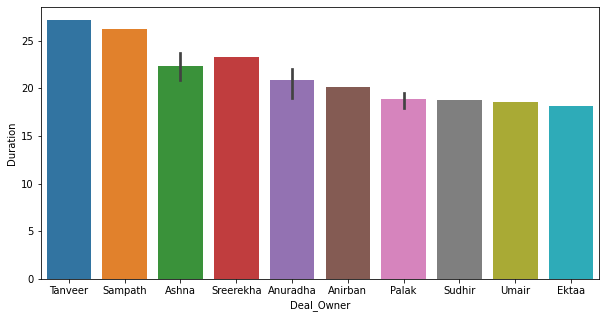

,Deal_Owner,Person_Grade,Person_Facilitator_Name,Person_Trial_Class_Topic,Duration
4643,Tanveer,Senior KG,FLTR0133,Category Spin,27.173194
3943,Sampath,Grade 3,FLTR0116,Acrostic poem,26.221088
1140,Ashna,Grade 2,FLTR0118,Homophones,23.743750
4125,Sreerekha,Grade 1,FLTR0119,Category Spin,23.303032
1040,Anuradha,Grade 4,FLTR0166,Acrostic poem,21.989468
1037,Anuradha,Grade 2,FLTR0141,Homophones,21.697616
1208,Ashna,Grade 3,FLTR0146,Category Spin,20.887639
761,Anirban,Senior KG,FLTR0103,Category Spin,20.191088
3189,Palak,Grade 1,FLTR0110,Category Spin,19.462529
3243,Palak,Grade 2,FLTR0122,Homophones,19.250475


In [ ]:
#df.Duration.hist()
df4=df.groupby(['Deal_Owner','Person_Grade','Person_Facilitator_Name','Person_Trial_Class_Topic'],as_index=False).agg({'Duration':'median'}).sort_values(by='Duration',ascending=False).head(15)
plt.figure(figsize=(10,5))
sns.barplot(x='Deal_Owner',y='Duration',data=df4)
plt.show()
#sns.barplot(x=('Deal_Owner',       ''),y=(  'Duration',   'mean'), data=df4)
#df4.columns
df4

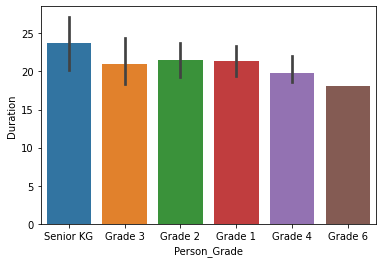

In [ ]:
sns.barplot(y = 'Duration',x='Person_Grade',data=df4)
plt.show()

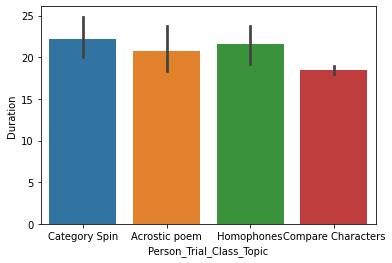

In [ ]:
sns.barplot(y='Duration',x='Person_Trial_Class_Topic',data=df4)
plt.show()